# Text Vectorization-Part 2

### Word Embeddings and Document Embeddings: Overview

### Problem with Traditional Text Vector Representations
#### Bag of Words (BoW):

    Words are represented as one-hot encoded vectors, where each word is assigned a unique index in a vocabulary.
    Example: In a vocabulary of size 10,000, the word "apple" might be represented as [0, 0, ..., 1, ..., 0].
    Drawbacks:
        sparsity: One-hot vectors are mostly zeros.
        No semantic similarity: "apple" and "orange" are just as dissimilar as "apple" and "table" in this representation.

#### TF-IDF:        
Captures word importance in documents but still doesn't encode semantic relationships between word

### Word Embeddings    
Definition
                A representation of words in a continuous vector space where similar words have similar representations. Word embeddings are typically pre-trained on large corpora using models like Word2Vec, GloVe, or FastText. Word embeddings are a way to represent words as dense, continuous vectors in a high-dimensional space. They aim to capture the semantic and syntactic relationships between words. 
    Word embeddings address traditional methods limitations by:
        Mapping words to a dense, low-dimensional space (e.g., 100 or 300 dimensions).
        Encoding words such that similar words (in meaning or context) have similar vector representations.
.s.s.

### How Word Embeddings Work
    a. Distributional Hypothesis
        Core Principle: "You shall know a word by the company it keeps" (Firth, 1957).
        Words appearing in similar contexts tend to have similar meanings. For example:
        "King" and "Queen" appear in contexts like "royalty," "throne," or "crown."
        "Apple" and "Orange" appear in contexts like "fruit," "eat," or "tree."
    b.Analogies: You can perform mathematical operations on word embeddings to find analogies. For example, "king - man + woman =   queen".

### Predictive Models (Neural Network-Based)
    These models learn embeddings by predicting relationships between words based on their context.
#### Word2Vec:
    Word2Vec, introduced by Mikolov et al., uses two main architectures: CBOW and Skip-Gram.
#### Continuous Bag of Words (CBOW):
    Goal: Predict a target word given its surrounding context words.
    Example:
            Input: Context words (e.g., "The ___ sits on the mat").
            Output: Target word (e.g., "cat").
    How it works:
            The model averages the embeddings of the context words.
            Passes the averaged vector through a softmax layer to predict the target word.
    Advantages: Faster training because it predicts one word at a time.
    Use Case: Works well for smaller datasets.
#### Skip-Gram:
    Goal: Predict context words given a target word.
    Example:
            Input: Target word (e.g., "cat").
            Output: Context words (e.g., "The ___ sits on the mat").
    How it works:
            The model learns to predict multiple context words for each target word.
    Advantages: Performs well with infrequent words.
    Use Case: Better for larger datasets with rare words.
#### FastText:
    FastText, developed by Facebook, extends Word2Vec by considering subword information:
    Key Idea: 
            Words are represented as n-grams of characters, enabling the model to understand morphological variations 
            (e.g.,  "running," "runner").
    Benefits:
            Handles out-of-vocabulary (OOV) words by composing embeddings from subwords.
            Captures richer semantic and syntactic relationships.
#### Global Co-Occurrence-Based Models:
    These models use statistical information from large corpora to learn embeddings.
#### GloVe (Global Vectors for Word Representation):
    GloVe, developed by Pennington et al., combines global co-occurrence statistics with vector space learning:
    Goal: Learn embeddings by factorizing a word-word co-occurrence matrix.
    Process:
            Build a matrix where each cell contains the frequency with which two words co-occur in a corpus.
            Factorize the matrix to reduce its dimensionality while preserving relationships.
            Optimize the embeddings using a loss function that ensures word relationships like ratios
            (e.g., king/man ≈ queen/woman).
    Advantages:
                Captures both global and local statistical relationships.
                Performs well in capturing analogies and word relationships.#### Contextual Models:
    Unlike traditional embeddings, contextual models generate word embeddings that depend on the surrounding context.
####  ELMo (Embeddings from Language Models):
    Key Idea: Words have different meanings depending on their context.
    Example:
            "Bank" in "river bank" vs. "money bank."
    How it works:
            Uses a deep bidirectional LSTM to capture context-dependent word embeddings.
    Benefits: Dynamic embeddings that adapt based on context.
#### BERT (Bidirectional Encoder Representations from Transformers):
    Key Idea: Learn contextual embeddings by pre-training on masked language modeling and next-sentence prediction tasks.
    How it works:
            Pre-trains using a Transformer architecture that processes words in both directions (left-to-right and right-to-left).
            Embeddings depend on the sentence as a whole.
    Advantages: Superior performance in downstream tasks like question answering and text classification.
#### Hybrid Approaches:
    Some methods combine predictive and co-occurrence-based techniques.
#### WordRank:
    Combines global matrix factorization with Skip-Gram-style predictive modeling.    Optimizes for both word co-occurrence statistics and contextual predictions.
    
#### Starspace 
    General-purpose model that learns embeddings for not just words but also sentences, documents, and even entire datasets.
    Uses similarity-based ranking loss for training. 


### Loss Functions Used in Word Embedding Models Training:
    Negative Sampling (Word2Vec):
        Instead of computing probabilities for the entire vocabulary, randomly sample negative examples (words that don’t co-occur) to reduce computational cost.
    Hierarchical Softmax (Word2Vec):
        Uses a tree-based approach to approximate softmax probabilities, speeding up training.
    Weighted Least Squares (GloVe):
        Balances the importance of frequent and rare words when training on the co-occurrence matrix.

### Intuitive Example
    Imagine embedding words in a 3D space (simplified for explanation). Each word is a point in this space:
        "King" and "Queen" are close because they share similar contexts (royalty, leadership).
        "Man" and "Woman" are close because they share contexts related to gender roles.
        The difference vector (King - Man) is similar to (Queen - Woman), capturing relationships like gender
    Visualization of Embeddings
        Positive Sentiments: ("happy," "joyful," "cheerful") cluster together.
        Negative Sentiments: ("sad," "angry," "miserable") form another cluster.
        Concepts: ("king," "queen") are close, and the difference reflects relationships like gender.
    This semantic structuring enables algorithms to understand language beyond raw text!


### Comparison of  Word Embedding Techniques:
!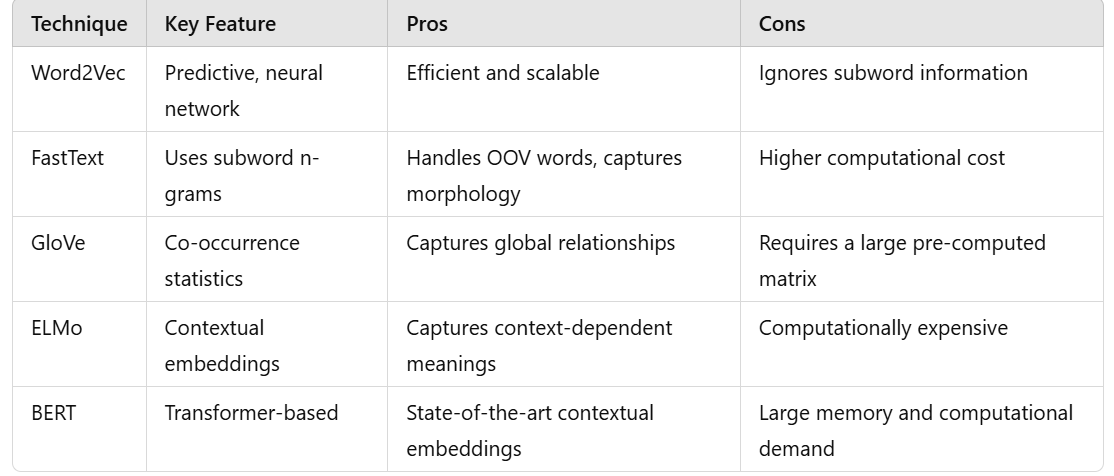

#### Case Study: Analyzing Text Similarity
    Scenario    
We have a dataset of product reviews, and we want to find which reviews are most similar to each other based on semantic meaning. We'll use word embeddings for understanding word similarity

In [ ]:
#### Install Libriries
#! pip install gensim

In [2]:
# Import required libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('punkt')

# Example reviews
reviews = [
    "The movie was fantastic! I loved it.",
    "It was a terrible movie, very boring.",
    "Amazing storyline and great acting!",
    "I did not enjoy the film. It was slow and uninteresting.",
    "The cinematography was stunning and the plot was captivating.",
    "Poorly made movie with a predictable plot.",
    "An outstanding performance by the lead actor.",
    "The film was okay but lacked originality.",
    "I thoroughly enjoyed the movie. It was brilliant!",
    "A waste of time. Not recommended at all."
]




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\umaMaheswari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Step 1: Tokenize reviews
tokenized_reviews = [word_tokenize(review.lower()) for review in reviews]
print("Tokenized Reviews:", tokenized_reviews)

Tokenized Reviews: [['the', 'movie', 'was', 'fantastic', '!', 'i', 'loved', 'it', '.'], ['it', 'was', 'a', 'terrible', 'movie', ',', 'very', 'boring', '.'], ['amazing', 'storyline', 'and', 'great', 'acting', '!'], ['i', 'did', 'not', 'enjoy', 'the', 'film', '.', 'it', 'was', 'slow', 'and', 'uninteresting', '.'], ['the', 'cinematography', 'was', 'stunning', 'and', 'the', 'plot', 'was', 'captivating', '.'], ['poorly', 'made', 'movie', 'with', 'a', 'predictable', 'plot', '.'], ['an', 'outstanding', 'performance', 'by', 'the', 'lead', 'actor', '.'], ['the', 'film', 'was', 'okay', 'but', 'lacked', 'originality', '.'], ['i', 'thoroughly', 'enjoyed', 'the', 'movie', '.', 'it', 'was', 'brilliant', '!'], ['a', 'waste', 'of', 'time', '.', 'not', 'recommended', 'at', 'all', '.']]


In [22]:
# Step 2: Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=250, window=5, min_count=1, workers=4)
# Check word embedding for a sample word
print("Embedding for 'movie':", word2vec_model.wv['movie'])

Embedding for 'movie': [-3.4674876e-03 -5.8140774e-04  3.7917558e-03 -3.0205848e-03
 -2.1475374e-03  3.7244610e-03 -3.5887130e-03  1.5320031e-03
  2.6525673e-04  2.6639889e-03  3.3279117e-03 -1.1421432e-03
 -1.5940494e-03  3.5612271e-03  8.3327427e-04  2.5028235e-03
 -3.7761535e-03  3.8355321e-03 -5.4235029e-04 -2.4198270e-03
  1.1979984e-03 -1.8078029e-04  1.8853087e-03 -9.1456290e-04
 -1.6544845e-03  9.1074168e-04  3.3451584e-03 -1.9991074e-03
  1.0636958e-03 -3.1964225e-03 -2.7110551e-03 -1.8589593e-04
 -3.5080058e-03  1.1159360e-03  6.4005621e-04 -9.2841784e-04
  2.0037489e-03  3.8954278e-03  3.3814621e-03 -7.5368036e-04
  8.2066818e-04 -1.6000011e-03 -3.2971168e-03  2.5106231e-03
 -7.7854493e-04 -2.6514370e-04 -7.0657610e-04 -1.8117336e-03
  1.6271020e-03 -1.7088577e-03 -3.8345153e-03  3.5811127e-03
  1.6622538e-03  3.6914379e-03  2.6610610e-03  1.1659187e-03
  3.9212117e-03 -1.7686560e-03 -2.7212929e-03  1.6894394e-03
  1.4912968e-03 -2.2656419e-03  3.8811683e-03 -1.4250356e-03
 

In [23]:
# Step 3: Create review embeddings
def get_review_word2vec_embedding(review):
    """Average Word2Vec embeddings for a review."""
    embedding = np.mean([word2vec_model.wv[word] for word in review if word in word2vec_model.wv], axis=0)
    return embedding
# Compute embeddings for all reviews
review_embeddings = np.array([get_review_word2vec_embedding(review) for review in tokenized_reviews])
# Step 4: Cluster reviews using K-Means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(review_embeddings)

# Assign clusters to reviews
cluster_labels = kmeans.labels_
print("Cluster Labels:", cluster_labels)

# Print reviews with their clusters
for i, review in enumerate(reviews):
    print(f"Review: {review} -> Cluster: {cluster_labels[i]}")



Cluster Labels: [0 0 0 0 0 1 0 0 0 1]
Review: The movie was fantastic! I loved it. -> Cluster: 0
Review: It was a terrible movie, very boring. -> Cluster: 0
Review: Amazing storyline and great acting! -> Cluster: 0
Review: I did not enjoy the film. It was slow and uninteresting. -> Cluster: 0
Review: The cinematography was stunning and the plot was captivating. -> Cluster: 0
Review: Poorly made movie with a predictable plot. -> Cluster: 1
Review: An outstanding performance by the lead actor. -> Cluster: 0
Review: The film was okay but lacked originality. -> Cluster: 0
Review: I thoroughly enjoyed the movie. It was brilliant! -> Cluster: 0
Review: A waste of time. Not recommended at all. -> Cluster: 1


##### The clustering results suggest that the current embeddings may not effectively capture the nuanced differences between positive and negative sentiments. To improve the quality of embeddings and the clustering results, you can take the following steps:

### Use Pre-Trained Embeddings
    Pre-trained FastText models provide word embeddings trained on massive datasets, offering better generalization.
    Pre-trained embeddings capture richer semantic and syntactic information than those trained on a small dataset.

In [36]:
# Load pre-trained Word2Vec model (Google News)
model_path =r"./GoogleNews-vectors-negative300.bin"  # Download and point to the local model
w2v_model = KeyedVectors.load_word2vec_format(model_path, binary=True)


In [37]:
# Check word embeddings for a sample word
print("Embedding for 'movie':", w2v_model['movie'])


Embedding for 'movie': [ 0.17480469 -0.10986328 -0.20019531  0.26757812 -0.06396484  0.06689453
  0.07958984  0.08398438  0.12695312  0.11621094  0.11523438 -0.13867188
 -0.08203125 -0.00143433 -0.19824219  0.13574219 -0.03955078  0.06933594
 -0.2265625  -0.20019531  0.03076172  0.16015625 -0.04174805  0.00427246
  0.09619141 -0.03320312  0.02783203  0.02124023  0.13867188 -0.02075195
 -0.31835938 -0.08837891 -0.23828125  0.02490234  0.06787109 -0.18066406
  0.27148438  0.16210938  0.04614258  0.20410156  0.22949219 -0.03710938
  0.140625    0.12890625 -0.22558594  0.03857422 -0.01300049  0.00582886
  0.23144531  0.1015625  -0.10351562 -0.10351562 -0.2578125   0.16503906
  0.03686523 -0.32421875  0.02893066 -0.11914062 -0.19238281  0.00086594
  0.06591797  0.265625   -0.15917969  0.26171875 -0.18359375  0.13085938
 -0.25       -0.05541992  0.27929688 -0.06103516 -0.05322266  0.07470703
 -0.24609375  0.203125   -0.23925781  0.00634766  0.10742188  0.0324707
  0.19921875  0.0456543  -0.0

In [38]:
# Create review embeddings by averaging word embeddings
def get_review_pretrained_embedding(review):
    """Average Word2Vec embeddings for a review."""
    vectors = [w2v_model[word] for word in review if word in w2v_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)  # Return zero vector if no valid embeddings

# Compute embeddings for all reviews
review_embeddings = np.array([get_review_pretrained_embedding(review) for review in tokenized_reviews])


In [39]:
# Cluster reviews using K-Means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(review_embeddings)

# Print reviews with their clusters
for i, review in enumerate(reviews):
    print(f"Review: {review} -> Cluster: {kmeans.labels_[i]}")


Review: The movie was fantastic! I loved it. -> Cluster: 0
Review: It was a terrible movie, very boring. -> Cluster: 0
Review: Amazing storyline and great acting! -> Cluster: 0
Review: I did not enjoy the film. It was slow and uninteresting. -> Cluster: 0
Review: The cinematography was stunning and the plot was captivating. -> Cluster: 0
Review: Poorly made movie with a predictable plot. -> Cluster: 0
Review: An outstanding performance by the lead actor. -> Cluster: 1
Review: The film was okay but lacked originality. -> Cluster: 0
Review: I thoroughly enjoyed the movie. It was brilliant! -> Cluster: 0
Review: A waste of time. Not recommended at all. -> Cluster: 0


In [40]:
# Using the same tokenized_reviews and KMeans as above with GloVe embeddings
import numpy as np

# Load GloVe model
def load_glove_model(glove_file):
    model = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            model[word] = vector
    return model

# Example GloVe model path
glove_model = load_glove_model(r"C:\NLP_Knowledge_Sharing\glove.6B.300d.txt")

# Get word embedding for a sample word
word = 'movie'
if word in glove_model:
    print(f"Embedding for '{word}': {glove_model[word]}")
else:
    print(f"Word '{word}' not found in GloVe model.")

def get_review_embedding_glove(review, glove_model):
    """Average GloVe embeddings for a review."""
    vectors = [glove_model[word] for word in review if word in glove_model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(50)  # Return zero vector if no valid embeddings

# Compute GloVe embeddings for all reviews
review_embeddings_glove = np.array([get_review_embedding_glove(review, glove_model) for review in tokenized_reviews])

# Cluster and visualize as before
# ... KMeans, t-SNE, and visualization code as shown previously


Embedding for 'movie': [-0.138     -0.12203    0.0054643 -0.010215   0.13134    0.28616
 -0.36436   -0.035735  -0.17218   -0.38864    0.58637    0.13189
 -0.1513     0.35515   -0.34298   -0.54394   -0.40302   -0.17129
  0.19899    0.24317    0.21332    0.60335    0.22556    0.46382
  0.064101   0.36409    0.25328   -0.79771    0.26771    0.42462
 -0.62075    0.31208   -0.25316    0.13562   -1.1323     0.0099104
 -0.62471   -0.048047   0.23139    0.16102    0.24774   -0.26149
 -0.17341    0.34005    0.21511   -0.26714    0.45698   -0.13671
  0.11654   -0.12222    0.062068  -0.45585   -0.30115    0.11208
  0.31146   -0.048065   0.10067    0.1441     0.27139   -0.17809
 -0.41069    0.093994   0.499      0.023845   0.42438   -0.027703
  0.044485  -0.15928    0.45054    0.13142    0.19913    0.36483
  0.26074    0.55475    0.47258   -0.43104    0.23181   -0.177
  0.21771   -0.37325   -0.15304   -0.45237    0.68007   -0.15976
 -0.094521   0.6455     0.10443   -0.19616    0.027374  -0.24713
 

In [42]:
# Cluster reviews using K-Means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(review_embeddings_glove)

# Print reviews with their clusters
for i, review in enumerate(reviews):
    print(f"Review: {review} -> Cluster: {kmeans.labels_[i]}")


Review: The movie was fantastic! I loved it. -> Cluster: 0
Review: It was a terrible movie, very boring. -> Cluster: 0
Review: Amazing storyline and great acting! -> Cluster: 0
Review: I did not enjoy the film. It was slow and uninteresting. -> Cluster: 0
Review: The cinematography was stunning and the plot was captivating. -> Cluster: 0
Review: Poorly made movie with a predictable plot. -> Cluster: 0
Review: An outstanding performance by the lead actor. -> Cluster: 1
Review: The film was okay but lacked originality. -> Cluster: 0
Review: I thoroughly enjoyed the movie. It was brilliant! -> Cluster: 0
Review: A waste of time. Not recommended at all. -> Cluster: 0


### Alternative Approach Using Sentence-BERT
    Here's how you could use Sentence-BERT for better clustering:



In [43]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Example reviews
reviews = [
    "The movie was fantastic! I loved it.",
    "It was a terrible movie, very boring.",
    "Amazing storyline and great acting!",
    "I did not enjoy the film. It was slow and uninteresting.",
    "The cinematography was stunning and the plot was captivating.",
    "Poorly made movie with a predictable plot.",
    "An outstanding performance by the lead actor.",
    "The film was okay but lacked originality.",
    "I thoroughly enjoyed the movie. It was brilliant!",
    "A waste of time. Not recommended at all."
]

# Step 1: Load pre-trained Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Step 2: Compute sentence embeddings
embeddings = model.encode(reviews)

# Step 3: Cluster using KMeans
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)

# Assign clusters
cluster_labels = kmeans.labels_

# Print reviews with their cluster labels
for i, review in enumerate(reviews):
    print(f"Review: {review} -> Cluster: {cluster_labels[i]}")



C:\Users\umaMaheswari\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Review: The movie was fantastic! I loved it. -> Cluster: 1
Review: It was a terrible movie, very boring. -> Cluster: 0
Review: Amazing storyline and great acting! -> Cluster: 1
Review: I did not enjoy the film. It was slow and uninteresting. -> Cluster: 0
Review: The cinematography was stunning and the plot was captivating. -> Cluster: 1
Review: Poorly made movie with a predictable plot. -> Cluster: 0
Review: An outstanding performance by the lead actor. -> Cluster: 1
Review: The film was okay but lacked originality. -> Cluster: 0
Review: I thoroughly enjoyed the movie. It was brilliant! -> Cluster: 1
Review: A waste of time. Not recommended at all. -> Cluster: 0


### The results are much improved with BERT Embeddings

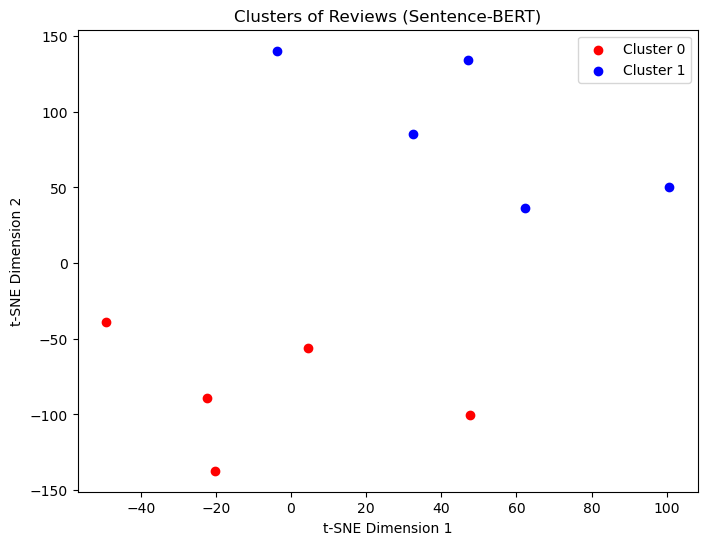

In [44]:
# Step 4: Visualize clusters
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced_embeddings = tsne.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
for i in range(num_clusters):
    points = reduced_embeddings[np.where(cluster_labels == i)]
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {i}", color=colors[i])

plt.title("Clusters of Reviews (Sentence-BERT)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()


In [ ]:
! pip freeze